Read the data and save it as two resolutions: low: 72x72 and high: 288x288

In [1]:
import bcolz
import numpy as np
np.random.seed(42)

from matplotlib import pyplot as plt
%matplotlib inline

from tensorflow.contrib.keras.python.keras.preprocessing import image
from tensorflow.contrib.keras.python.keras.applications import imagenet_utils

In [2]:
def get_batches(dirpath, gen=image.ImageDataGenerator(), target_size=(224, 224), shuffle=False, batch_size=64, class_mode='categorical'):
    return gen.flow_from_directory(dirpath, target_size=target_size, class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

We dont really care about splitting anything here, just take all the data

In [3]:
# target_size = (72, 72)
target_size = (288, 288)

In [4]:
train_batches = get_batches('./data', target_size=target_size, batch_size=1)

Found 37500 images belonging to 3 classes.


In [5]:
train_batches.class_indices

{'imgs-72x72.arr': 0, 'test': 1, 'train': 2}

In [6]:
train_batches.samples

37500

In [7]:
shape = (train_batches.samples, target_size[0], target_size[1], 3)
img_arr = np.empty(shape, dtype=np.int32)

In [8]:
img_arr.shape

(37500, 288, 288, 3)

In [9]:
for i in range(train_batches.samples):
    batch = next(train_batches)
    img_arr[i] = batch[0]

Plot one img to see that we are good and save the array

In [10]:
def to_plot(img):
    return np.rollaxis(img, 0, 1).astype(np.uint8)

def plot(img):
    plt.imshow(to_plot(img))

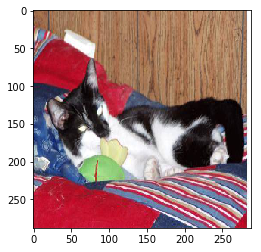

In [11]:
plot(img_arr[322])

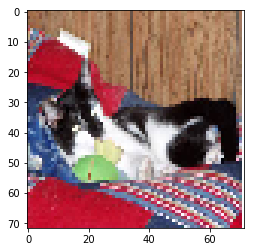

In [11]:
plot(img_arr[322])

In [12]:
def save_array(fname, arr):
    c = bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()

In [13]:
save_array('data/imgs-{}x{}.arr'.format(target_size[0], target_size[1]), img_arr)